### *Goal*

***we build a model to predict the '`Estimated time take for delivery`'***

**Start : `created_at`**
 
**End : `actaul_delivery_time`**

**target_varibale will be**
 
`total seconds value between 'created_at' and 'actaul_delivery_time'`

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
data = pd.read_csv("dataset/historical_data.csv")
data.shape

(197428, 16)

In [4]:
color_coll =["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6","#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [5]:
len(color_coll)

105

In [6]:
df = data.copy()
df.shape

(197428, 16)

In [7]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [8]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     196441 non-null  float64
 1   created_at                                    197428 non-null  object 
 2   actual_delivery_time                          197421 non-null  object 
 3   store_id                                      197428 non-null  int64  
 4   store_primary_category                        192668 non-null  object 
 5   order_protocol                                196433 non-null  float64
 6   total_items                                   197428 non-null  int64  
 7   subtotal                                      197428 non-null  int64  
 8   num_distinct_items                            197428 non-null  int64  
 9   min_item_price                                19

In [10]:
df["actual_delivery_time"][:5]


0    2015-02-06 23:27:16
1    2015-02-10 22:56:29
2    2015-01-22 21:09:09
3    2015-02-03 22:13:00
4    2015-02-15 03:20:26
Name: actual_delivery_time, dtype: object

In [11]:
df["market_id"].unique()

array([ 1.,  2.,  3.,  4., nan,  5.,  6.])

#### converting `created_at` and `actaul_delivery_time` to datetime format

In [12]:
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 16 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   market_id                                     196441 non-null  float64       
 1   created_at                                    197428 non-null  datetime64[ns]
 2   actual_delivery_time                          197421 non-null  datetime64[ns]
 3   store_id                                      197428 non-null  int64         
 4   store_primary_category                        192668 non-null  object        
 5   order_protocol                                196433 non-null  float64       
 6   total_items                                   197428 non-null  int64         
 7   subtotal                                      197428 non-null  int64         
 8   num_distinct_items                            197428 n

In [13]:
df["market_id"].value_counts()

market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64

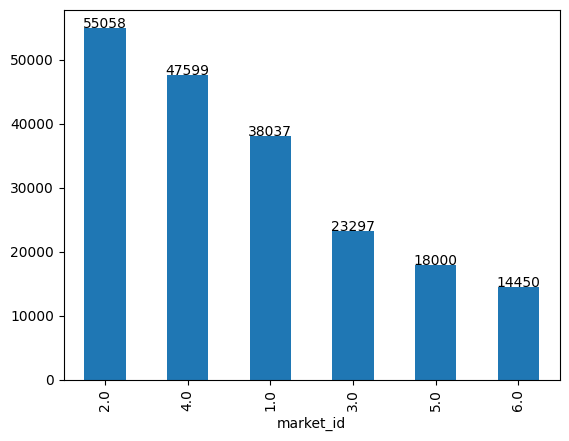

In [14]:
fig, ax = plt.subplots()
ax = df["market_id"].value_counts().plot(kind="bar")

patches = ax.patches

for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 1
    ax.annotate(f"{list(df['market_id'].value_counts())[i]}", (x,y),ha="center")

In [16]:
df["market_id"].values[:20]

array([1., 2., 3., 3., 3., 3., 3., 3., 2., 3., 3., 3., 3., 3., 1., 1., 1.,
       1., 1., 1.])

In [17]:
max_repeated_location = df["market_id"].value_counts().index.to_list()

max_repeated_location

[2.0, 4.0, 1.0, 3.0, 5.0, 6.0]

*we have one more object column*

In [18]:
df["store_primary_category"].value_counts().keys()

Index(['american', 'pizza', 'mexican', 'burger', 'sandwich', 'chinese',
       'japanese', 'dessert', 'fast', 'indian', 'thai', 'italian',
       'vietnamese', 'mediterranean', 'breakfast', 'other', 'salad', 'greek',
       'seafood', 'barbecue', 'asian', 'cafe', 'sushi', 'alcohol', 'korean',
       'smoothie', 'catering', 'middle-eastern', 'hawaiian', 'dim-sum',
       'steak', 'vegetarian', 'burmese', 'pasta', 'persian', 'french',
       'latin-american', 'bubble-tea', 'convenience-store', 'cajun',
       'brazilian', 'nepalese', 'vegan', 'filipino', 'peruvian', 'caribbean',
       'turkish', 'gastropub', 'southern', 'tapas', 'pakistani', 'ethiopian',
       'british', 'afghan', 'malaysian', 'soup', 'argentine', 'german',
       'gluten-free', 'irish', 'kosher', 'spanish', 'singaporean',
       'comfort-food', 'moroccan', 'cheese', 'european', 'russian', 'african',
       'lebanese', 'belgian', 'indonesian', 'chocolate', 'alcohol-plus-food'],
      dtype='object', name='store_primary

In [20]:
df["store_primary_category"].value_counts().values


array([19399, 17321, 17099, 10958, 10060,  9421,  9196,  8773,  7372,
        7314,  7225,  7179,  6095,  5512,  5425,  3988,  3745,  3326,
        2730,  2722,  2449,  2229,  2187,  1850,  1813,  1659,  1633,
        1501,  1499,  1112,  1092,   845,   821,   633,   607,   575,
         520,   519,   348,   316,   310,   299,   279,   260,   254,
         253,   237,   184,   156,   146,   139,   134,   133,   119,
         102,    74,    72,    68,    62,    55,    51,    37,    33,
          28,    25,    24,    22,    19,    10,     9,     2,     2,
           1,     1], dtype=int64)

In [21]:
df.isna().sum()

market_id                                         987
created_at                                          0
actual_delivery_time                                7
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift_dashers                           16262
total_busy_dashers                              16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
dtype: int64

In [22]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [23]:
def get_nunique():

    df_columns = []
    for i in df.columns:
        uni = df[i].nunique()
        print(f"({i}) has unique values : {uni} and has Nan values : {df[i].isna().sum()}")

get_nunique()

(market_id) has unique values : 6 and has Nan values : 987
(created_at) has unique values : 180985 and has Nan values : 0
(actual_delivery_time) has unique values : 178110 and has Nan values : 7
(store_id) has unique values : 6743 and has Nan values : 0
(store_primary_category) has unique values : 74 and has Nan values : 4760
(order_protocol) has unique values : 7 and has Nan values : 995
(total_items) has unique values : 57 and has Nan values : 0
(subtotal) has unique values : 8368 and has Nan values : 0
(num_distinct_items) has unique values : 20 and has Nan values : 0
(min_item_price) has unique values : 2312 and has Nan values : 0
(max_item_price) has unique values : 2652 and has Nan values : 0
(total_onshift_dashers) has unique values : 172 and has Nan values : 16262
(total_busy_dashers) has unique values : 159 and has Nan values : 16262
(total_outstanding_orders) has unique values : 281 and has Nan values : 16262
(estimated_order_place_duration) has unique values : 98 and has Nan

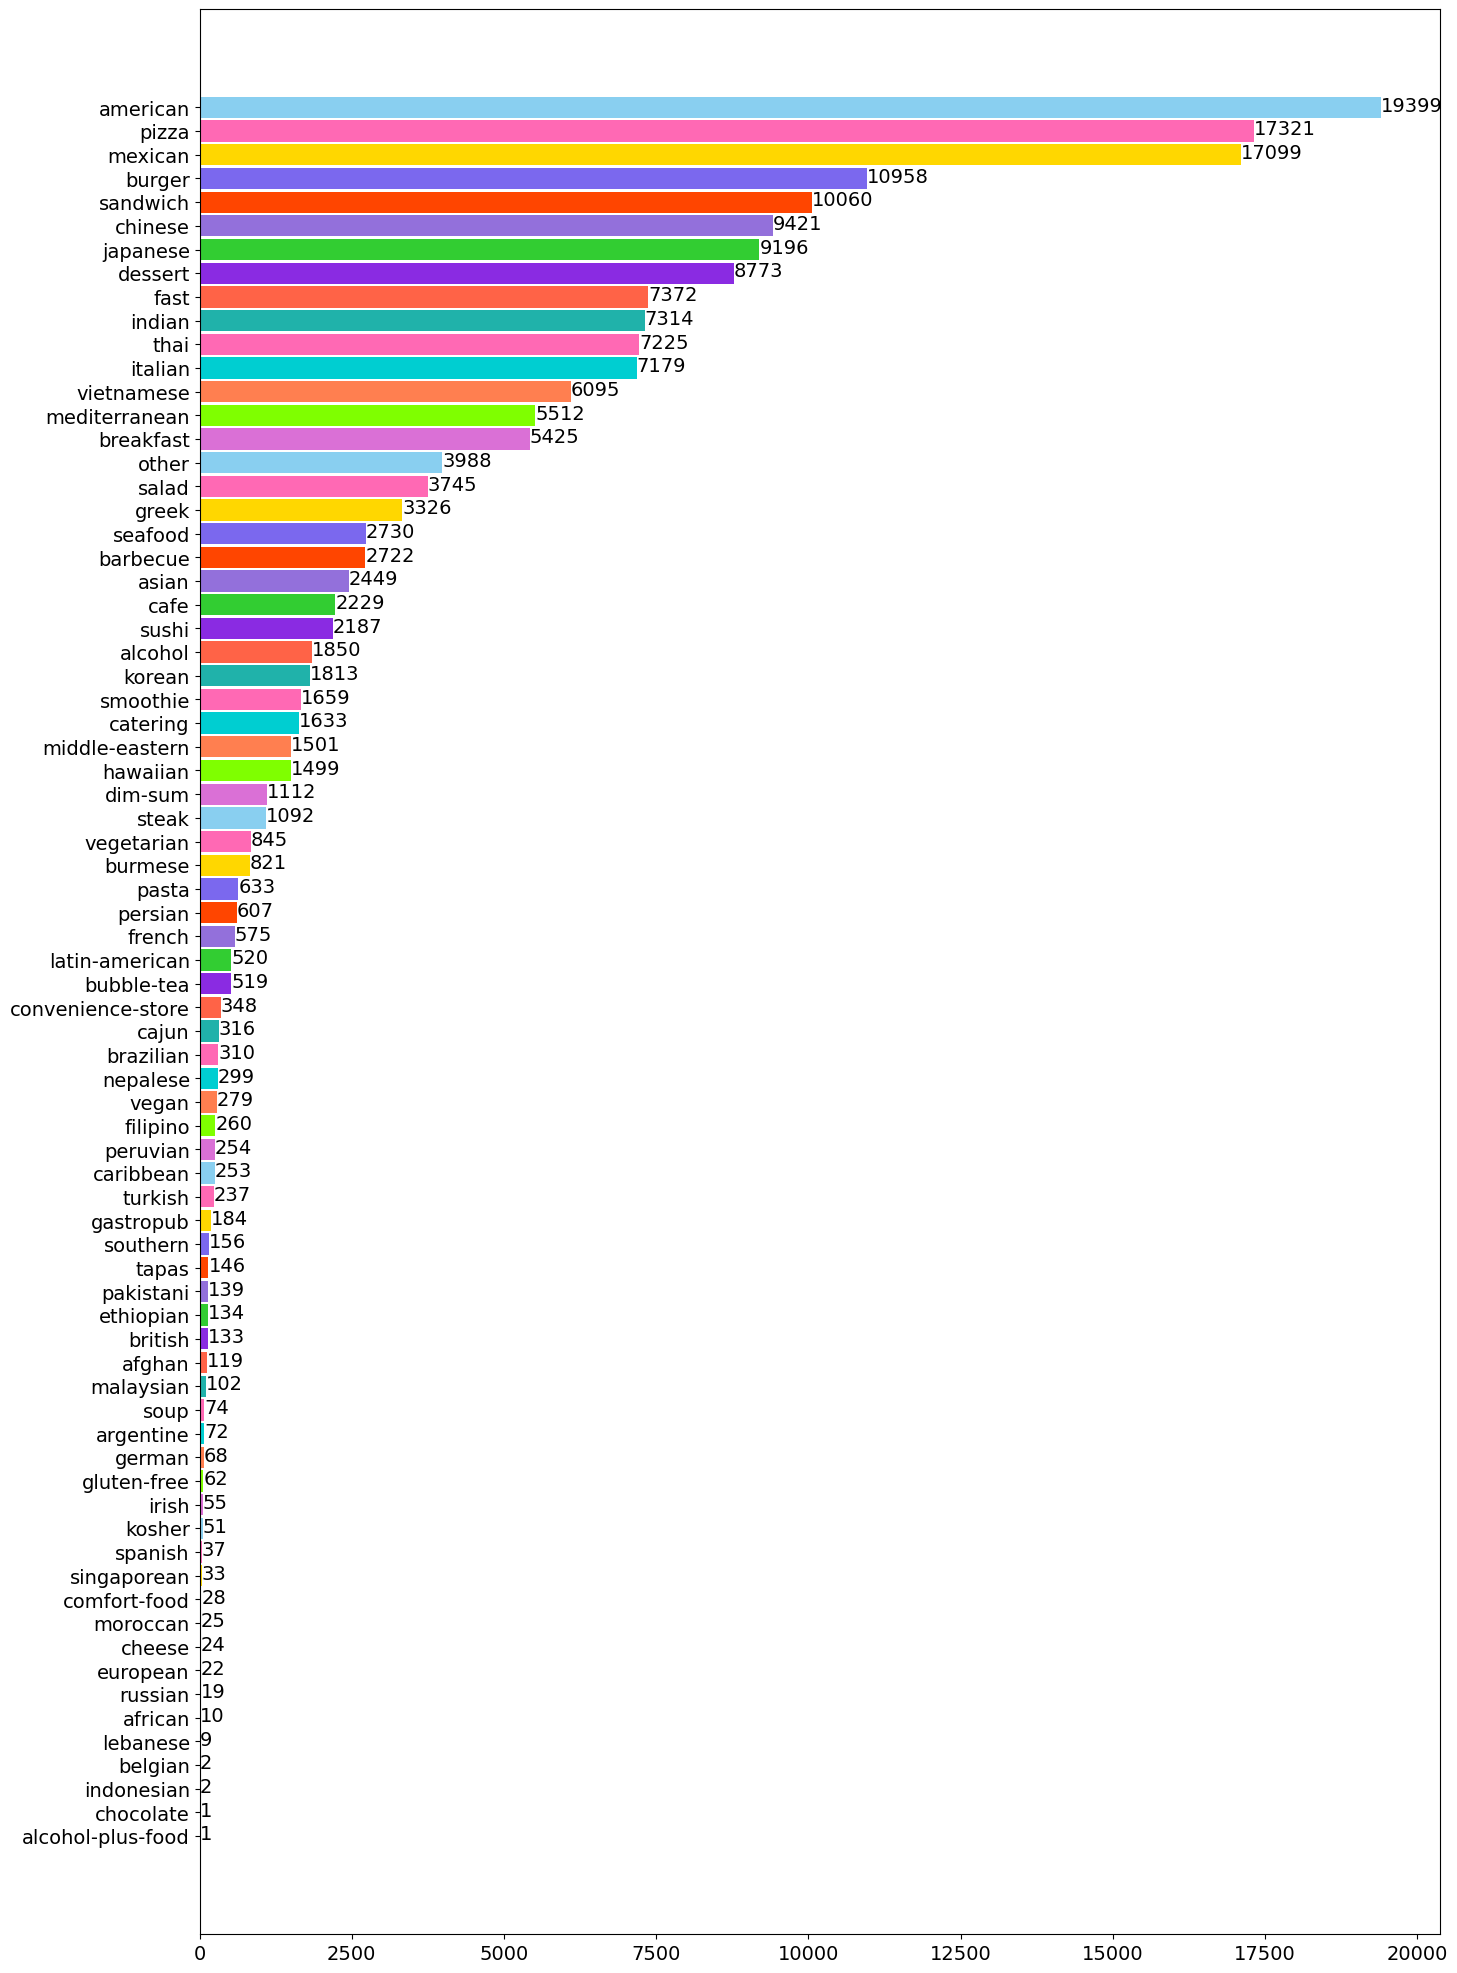

In [24]:
fig , ax = plt.subplots(figsize=(16,25))
y_position = range(len(list(df["store_primary_category"].value_counts().keys()))) 
# y_position = range(0,74)
performance2 = df["store_primary_category"].value_counts().values # numerical values

ax.barh(y_position,performance2,height=0.9,color=[i for i in color_coll])
ax.invert_yaxis()
ax.set_yticks(range(0,74), labels=list(df['store_primary_category'].value_counts().keys()))

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_width()
    y = patches[i].get_y() + patches[i].get_height()/1.5
    ax.annotate(f"{df['store_primary_category'].value_counts().values[i]}",(x,y),ha="left",fontsize=14)
    ax.tick_params(axis="both",labelsize=14)
    


In [25]:
df["order_protocol"].mode()

0    1.0
Name: order_protocol, dtype: float64

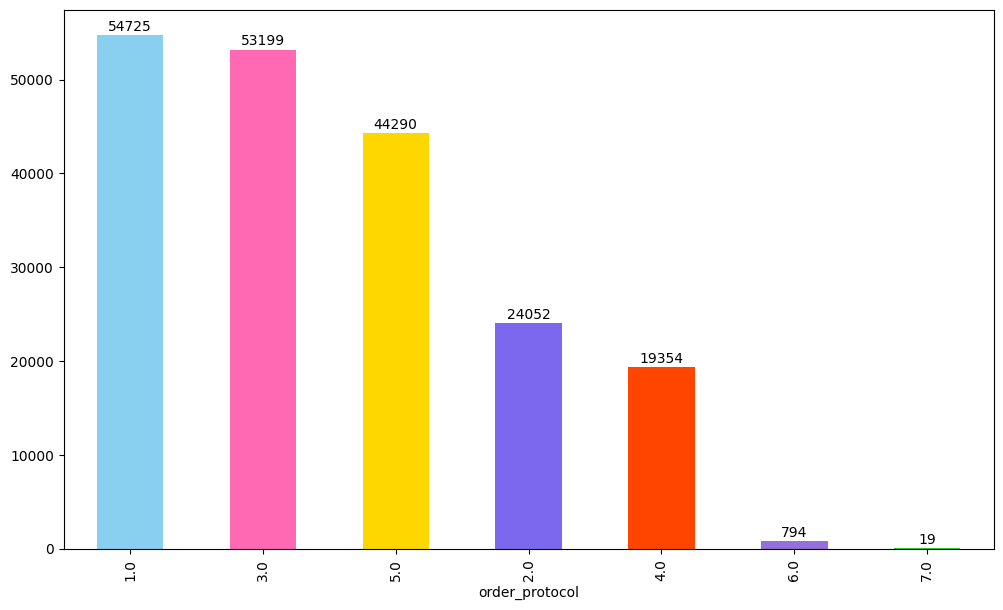

In [26]:
fig , ax = plt.subplots(figsize=(12,7))
ax = df["order_protocol"].value_counts().plot(kind="bar",color=[i for i in color_coll])
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x()  + patches[i].get_width()/2
    y = patches[i].get_height() + 500
    ax.annotate(f"{df['order_protocol'].value_counts().values[i]}", (x,y),ha="center")


In [27]:
df["order_protocol"].fillna(df["order_protocol"].mode()[0],inplace=True)

In [28]:
df["order_protocol"].isna().sum()

0

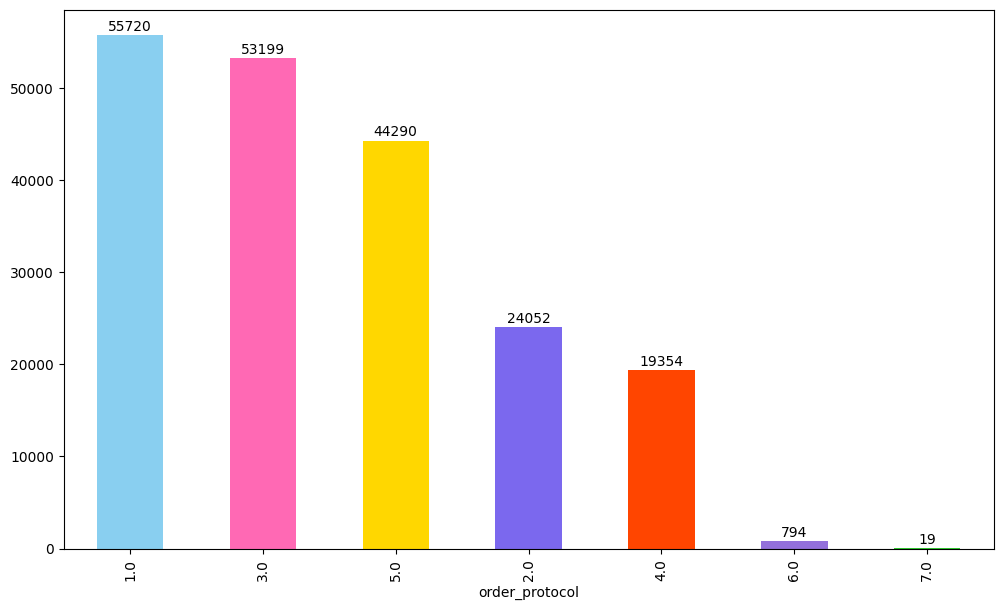

In [29]:
fig , ax = plt.subplots(figsize=(12,7))
ax = df["order_protocol"].value_counts().plot(kind="bar",color=[i for i in color_coll])
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x()  + patches[i].get_width()/2
    y = patches[i].get_height() + 500
    ax.annotate(f"{df['order_protocol'].value_counts().values[i]}", (x,y),ha="center")


In [30]:
get_nunique()

(market_id) has unique values : 6 and has Nan values : 987
(created_at) has unique values : 180985 and has Nan values : 0
(actual_delivery_time) has unique values : 178110 and has Nan values : 7
(store_id) has unique values : 6743 and has Nan values : 0
(store_primary_category) has unique values : 74 and has Nan values : 4760
(order_protocol) has unique values : 7 and has Nan values : 0
(total_items) has unique values : 57 and has Nan values : 0
(subtotal) has unique values : 8368 and has Nan values : 0
(num_distinct_items) has unique values : 20 and has Nan values : 0
(min_item_price) has unique values : 2312 and has Nan values : 0
(max_item_price) has unique values : 2652 and has Nan values : 0
(total_onshift_dashers) has unique values : 172 and has Nan values : 16262
(total_busy_dashers) has unique values : 159 and has Nan values : 16262
(total_outstanding_orders) has unique values : 281 and has Nan values : 16262
(estimated_order_place_duration) has unique values : 98 and has Nan v

In [31]:
df[df["market_id"].isna()]["store_id"]


45        5054
182       5081
970       1148
1126      1904
1625       283
          ... 
196027    4862
196561    4077
197170    1409
197171    1409
197259    1340
Name: store_id, Length: 987, dtype: int64

In [32]:
df.dropna(subset=["actual_delivery_time"],inplace=True)
df["actual_delivery_time"].isna().sum()

0

In [33]:
get_nunique()

(market_id) has unique values : 6 and has Nan values : 987
(created_at) has unique values : 180981 and has Nan values : 0
(actual_delivery_time) has unique values : 178110 and has Nan values : 0
(store_id) has unique values : 6743 and has Nan values : 0
(store_primary_category) has unique values : 74 and has Nan values : 4760
(order_protocol) has unique values : 7 and has Nan values : 0
(total_items) has unique values : 57 and has Nan values : 0
(subtotal) has unique values : 8368 and has Nan values : 0
(num_distinct_items) has unique values : 20 and has Nan values : 0
(min_item_price) has unique values : 2312 and has Nan values : 0
(max_item_price) has unique values : 2652 and has Nan values : 0
(total_onshift_dashers) has unique values : 172 and has Nan values : 16262
(total_busy_dashers) has unique values : 159 and has Nan values : 16262
(total_outstanding_orders) has unique values : 281 and has Nan values : 16262
(estimated_order_place_duration) has unique values : 98 and has Nan v

In [34]:
grr = df.groupby("store_primary_category")
gtt = grr.get_group("american")
gtt.subtotal.sum()

51572367

In [35]:
# def get_group(col_name):
#     gr = df.groupby(col_name)
#     regional_money_col = {}

#     for i in df[col_name].unique():

#         if df[i] == df[i]:

#             gt = gr.get_group(i)

#             amount = gt.subtotal.sum()

#             regional_money_col[i] = amount

#     return regional_money_col

# get_group("store_primary_category")

# above code will give an error for nan value

In [36]:
def get_group(col_name):
    gr = df.groupby(col_name)
    regional_money_col = {}

    for i in range(len(df[col_name].unique())):

        if df[col_name][i] == df[col_name][i]:

            gt = gr.get_group(df[col_name].unique()[i])

            amount = gt.subtotal.sum()

            regional_money_col[df[col_name].unique()[i]] = amount

    return regional_money_col

cuisine_sales =  get_group("store_primary_category")
# cuisine_sales = sorted(cuisine_sales.items(), key = lambda x : x[1])
cuisine_sales

{'american': 51572367,
 'mexican': 39247595,
 'salad': 9403015,
 'mediterranean': 14871760,
 'japanese': 30902830,
 'greek': 10034456,
 'catering': 5295637,
 'filipino': 665636,
 'convenience-store': 480009,
 'other': 9461492,
 'korean': 5455228,
 'vegan': 700235,
 'asian': 6449079,
 'barbecue': 8458422,
 'fast': 11736506,
 'dessert': 21377575,
 'smoothie': 3855644,
 'seafood': 8901952,
 'vietnamese': 13765960,
 'cajun': 1058606,
 'steak': 4072616,
 'persian': 2161525,
 'burmese': 3095896,
 'british': 410050,
 'pasta': 1791696,
 'alcohol': 4914702,
 'dim-sum': 3732443,
 'peruvian': 804639,
 'turkish': 683948,
 'malaysian': 334040,
 'ethiopian': 424008,
 'afghan': 355224,
 'bubble-tea': 871548,
 'german': 244532,
 'french': 1862859,
 'caribbean': 681238,
 'gluten-free': 176039,
 'comfort-food': 59951,
 'gastropub': 612839,
 'pakistani': 400368,
 'moroccan': 107426,
 'spanish': 125450,
 'southern': 478775,
 'tapas': 407198,
 'russian': 64564,
 'brazilian': 937070,
 'european': 65138,
 'c

In [37]:
df["store_primary_category"][0]


'american'

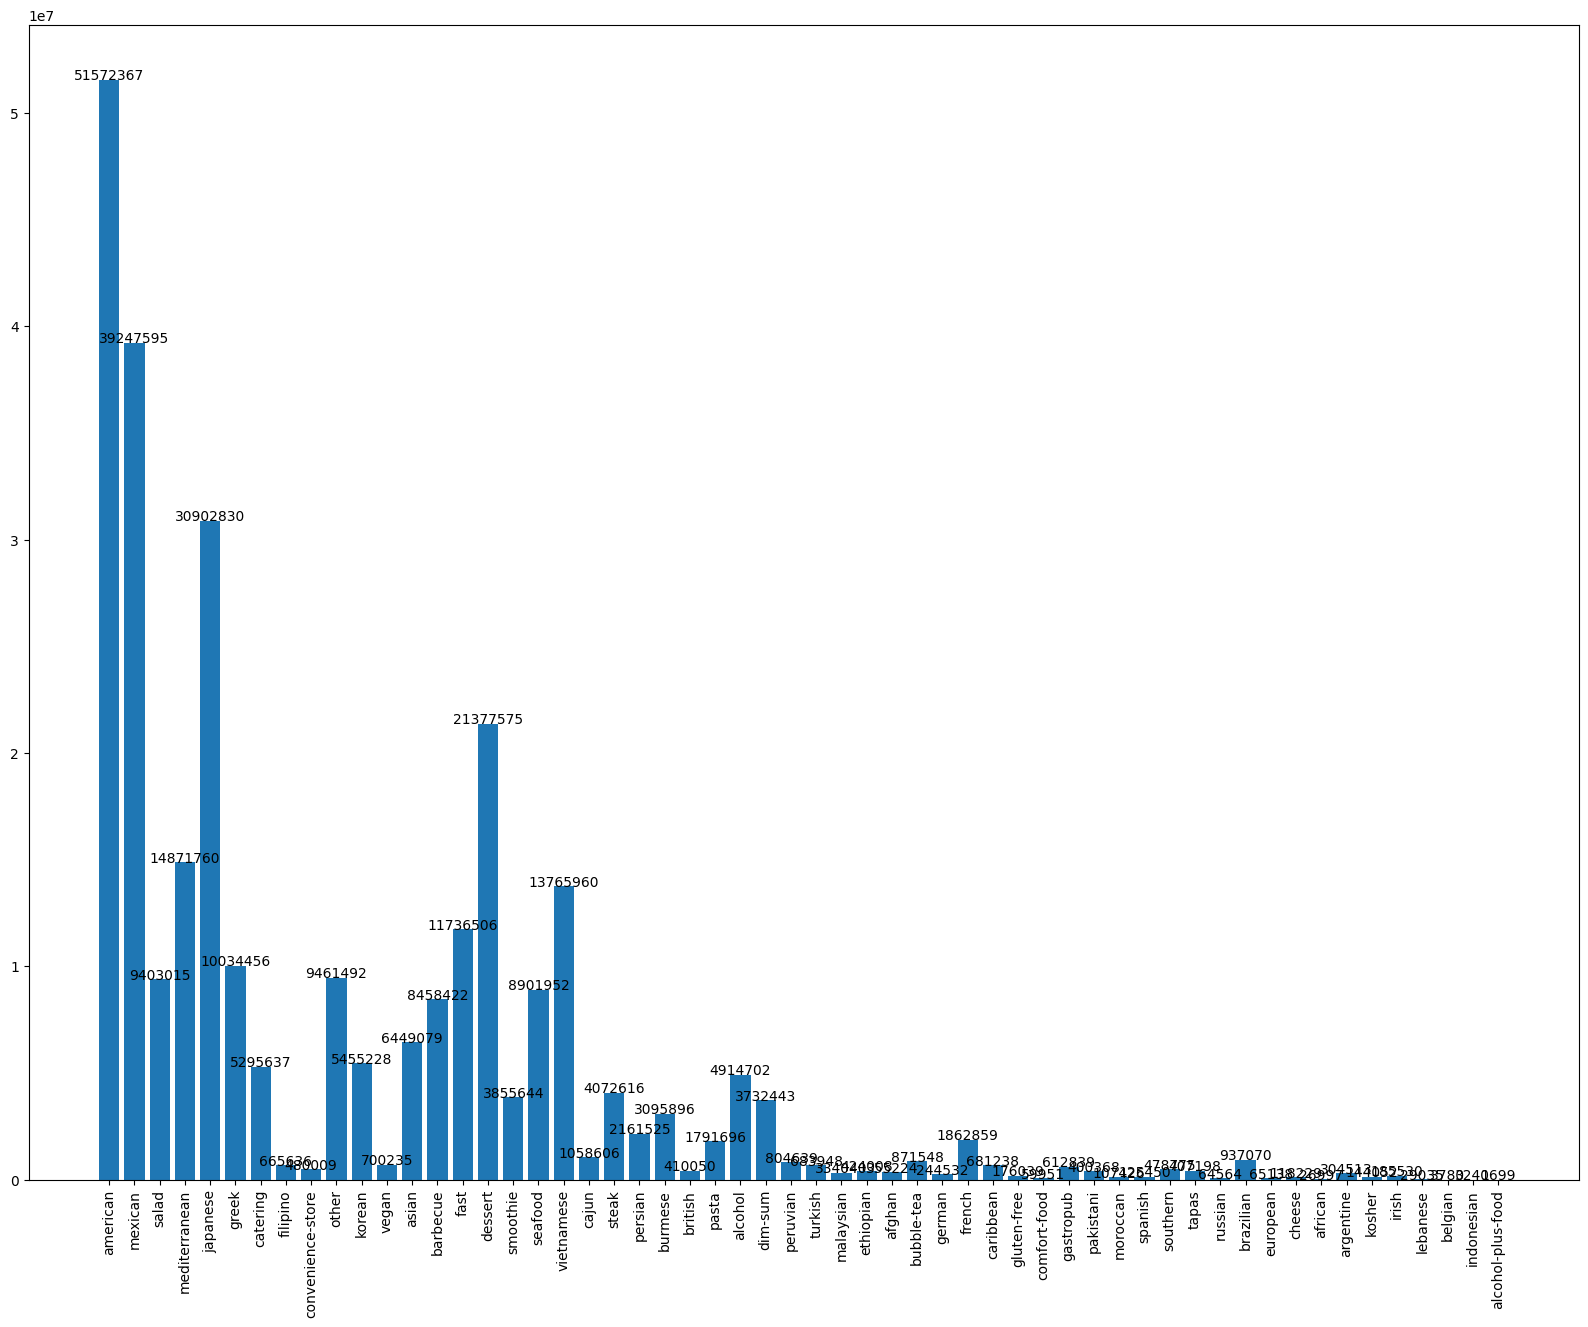

In [38]:
fig , ax = plt.subplots(figsize = (20,15))
ax.bar(cuisine_sales.keys(), cuisine_sales.values())

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 50
    ax.annotate(f"{list(cuisine_sales.values())[i]}", (x,y),ha="center")
    ax.set_xticks(range(len(list(cuisine_sales.keys()))),cuisine_sales.keys(),rotation=90)



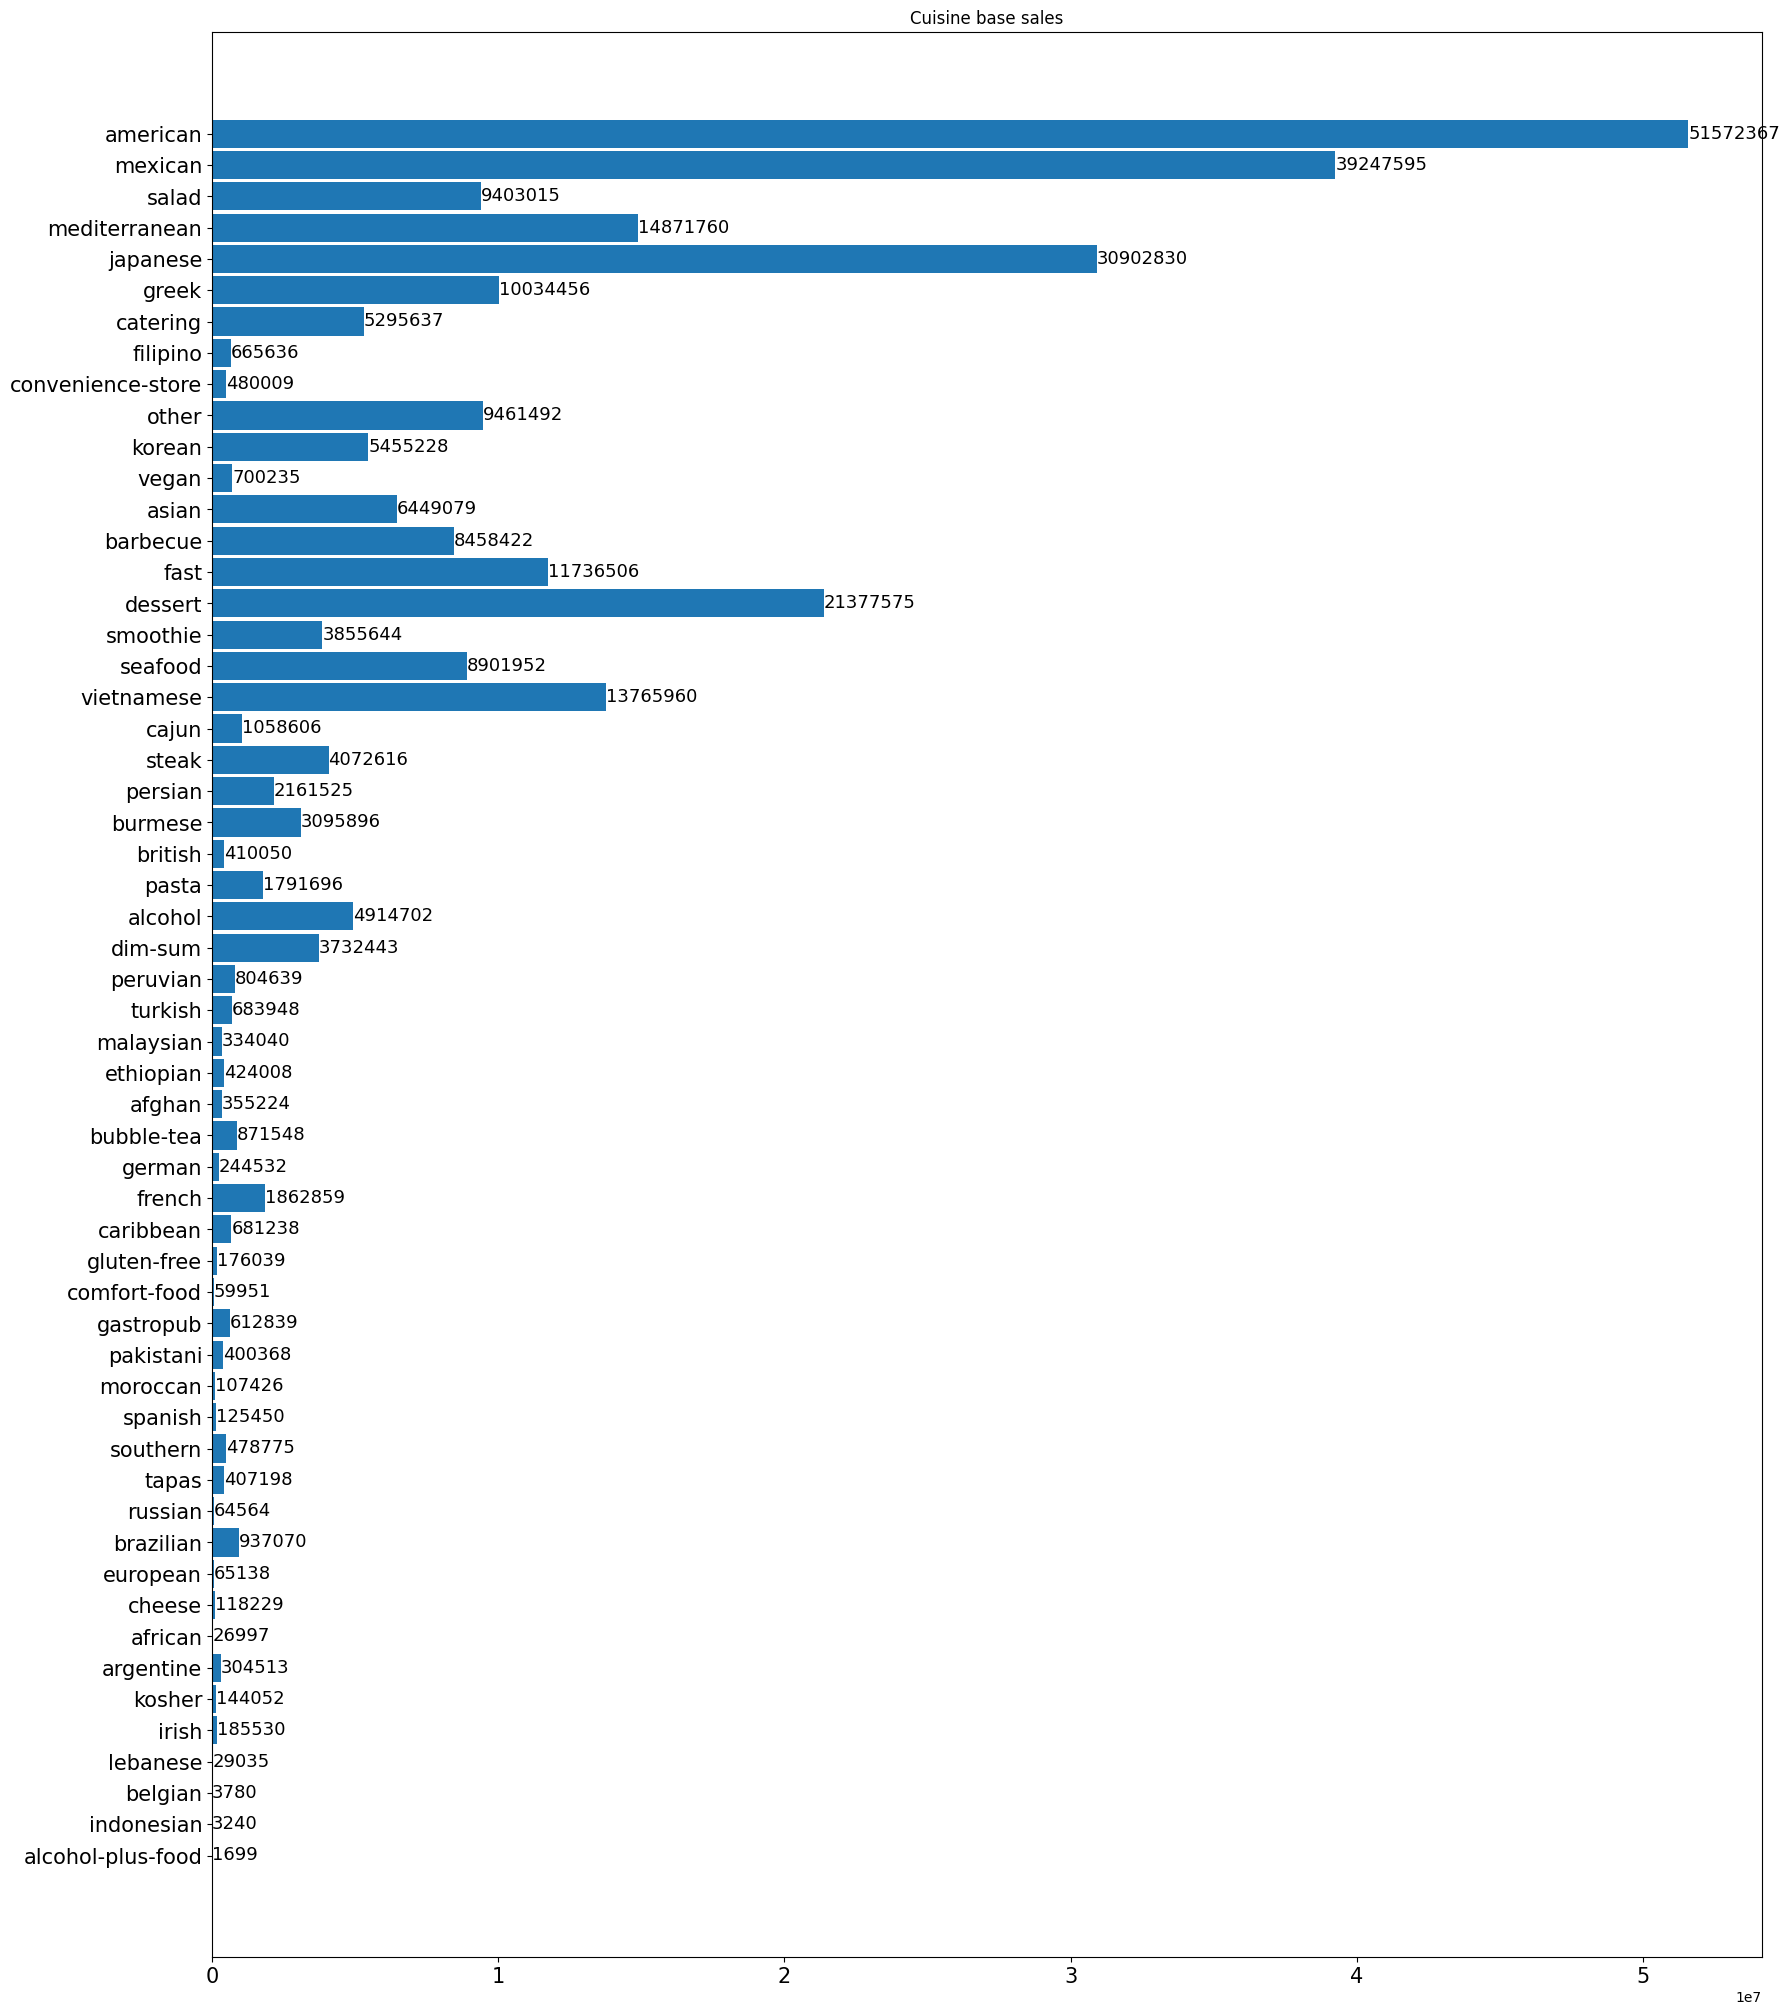

In [39]:
fig , ax = plt.subplots(figsize=(20,25))
y_position1 = range(len(list(cuisine_sales.keys())))
performance1 = cuisine_sales.values()
ax.barh(y_position1,performance1,height=0.9)
ax.invert_yaxis()
ax.set_yticks(y_position1,labels=list(cuisine_sales.keys()))

patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_width()
    y = patches[i].get_y() + patches[i].get_height()/1.5
    ax.annotate(f"{list(cuisine_sales.values())[i]}", (x,y), ha="left",fontsize=13)
    ax.tick_params(axis="both", labelsize=15)
    ax.set_title("Cuisine base sales")


In [40]:
df[df["store_primary_category"].isna()]["subtotal"].sum()

13277301

In [41]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [45]:
df["total_onshift_dashers"].unique()

array([ 33.,   1.,   6.,   2.,  10.,   7.,   8.,   3.,  16.,   5.,   4.,
        24.,  12.,  19.,  21.,  22.,  27.,  13.,  18., 117., 130., 121.,
        94.,  34.,  17.,  38.,  20.,  15.,  39.,  26.,  30.,  35.,  11.,
        14.,  32.,  29.,  25.,  23.,  61.,  41.,  58.,  51.,  57.,  60.,
         9., 108.,  72.,  89., 112.,  55., 126.,  80.,  69., 125., 113.,
       105.,  98.,  86.,  90.,  87.,  74.,  84.,  91.,  96., 123., 101.,
       119.,  nan, 129.,  66.,  81.,  36.,  75.,  43.,  70.,  65.,  77.,
       114.,  62., 116., 102.,  76.,  67.,  64.,  88.,  73.,  63.,  46.,
        28.,  47., 110.,  97.,  42.,  79.,  49.,  50.,  37.,  92., 103.,
        44.,  68.,  56.,   0., 107.,  78.,  71., 128., 104.,  45.,  31.,
       100.,  40.,  53., 115., 109.,  99.,  85.,  59., 118.,  54.,  52.,
        48., 132., 127., 133., 131., 149.,  93., 111.,  95.,  82., 136.,
       120., 134., 124., 106., 137.,  83., 152., 147., 144., 150., 145.,
       122., 155., 135., 151., 140., 141., 143., 13

*`total_onshift_dashers`: Number of available dashers who are within 10 miles of the store 
at the time of order creation*

*`total_busy_dashers`: Subset of above total_onshift_dashers who are currently working 
on an order*

*`total_outstanding_orders`: Number of orders within 10 miles of this order that are 
currently being processed.*

In [50]:
df.dropna(subset = ["total_onshift_dashers"],inplace=True)
df.dropna(subset = ["total_busy_dashers"],inplace=True)
df.dropna(subset = ["total_outstanding_orders"],inplace=True)
get_nunique()

(market_id) has unique values : 6 and has Nan values : 919
(created_at) has unique values : 167225 and has Nan values : 0
(actual_delivery_time) has unique values : 164753 and has Nan values : 0
(store_id) has unique values : 5790 and has Nan values : 0
(store_primary_category) has unique values : 73 and has Nan values : 4215
(order_protocol) has unique values : 7 and has Nan values : 0
(total_items) has unique values : 55 and has Nan values : 0
(subtotal) has unique values : 8237 and has Nan values : 0
(num_distinct_items) has unique values : 20 and has Nan values : 0
(min_item_price) has unique values : 2267 and has Nan values : 0
(max_item_price) has unique values : 2601 and has Nan values : 0
(total_onshift_dashers) has unique values : 172 and has Nan values : 0
(total_busy_dashers) has unique values : 159 and has Nan values : 0
(total_outstanding_orders) has unique values : 281 and has Nan values : 0
(estimated_order_place_duration) has unique values : 96 and has Nan values : 0
(e

In [53]:
df["market_id"].fillna(df["market_id"].mode()[0],inplace=True)
df.dropna(subset = ["store_primary_category"],inplace=True)
df.dropna(subset= ["estimated_store_to_consumer_driving_duration"],inplace=True)
get_nunique()

(market_id) has unique values : 6 and has Nan values : 0
(created_at) has unique values : 163242 and has Nan values : 0
(actual_delivery_time) has unique values : 160836 and has Nan values : 0
(store_id) has unique values : 5647 and has Nan values : 0
(store_primary_category) has unique values : 73 and has Nan values : 0
(order_protocol) has unique values : 7 and has Nan values : 0
(total_items) has unique values : 54 and has Nan values : 0
(subtotal) has unique values : 8184 and has Nan values : 0
(num_distinct_items) has unique values : 20 and has Nan values : 0
(min_item_price) has unique values : 2252 and has Nan values : 0
(max_item_price) has unique values : 2585 and has Nan values : 0
(total_onshift_dashers) has unique values : 172 and has Nan values : 0
(total_busy_dashers) has unique values : 158 and has Nan values : 0
(total_outstanding_orders) has unique values : 281 and has Nan values : 0
(estimated_order_place_duration) has unique values : 94 and has Nan values : 0
(estima

In [54]:
df.shape

(176472, 16)

## Adding target column 

In [56]:
df["time_taken_to_deliver"] = df["actual_delivery_time"] - df["created_at"]
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_taken_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,0 days 01:02:59
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,0 days 01:07:04
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,0 days 00:26:26
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,0 days 00:37:53
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,0 days 00:49:48


In [57]:
df["time_taken_to_deliver"] = df["time_taken_to_deliver"].dt.total_seconds()
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,time_taken_to_deliver
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0,3779.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0,4024.0
8,2.0,2015-02-16 00:11:35,2015-02-16 00:38:01,5477,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0,1586.0
14,1.0,2015-02-12 03:36:46,2015-02-12 04:14:39,2841,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0,2273.0
15,1.0,2015-01-27 02:12:36,2015-01-27 03:02:24,2841,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0,2988.0


In [58]:
df.dtypes

market_id                                              float64
created_at                                      datetime64[ns]
actual_delivery_time                            datetime64[ns]
store_id                                                 int64
store_primary_category                                  object
order_protocol                                         float64
total_items                                              int64
subtotal                                                 int64
num_distinct_items                                       int64
min_item_price                                           int64
max_item_price                                           int64
total_onshift_dashers                                  float64
total_busy_dashers                                     float64
total_outstanding_orders                               float64
estimated_order_place_duration                           int64
estimated_store_to_consumer_driving_duration           